In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/Dataset Macem-macem/DataSet Covid19/Data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Dataset Macem-macem/DataSet Covid19')
zip_ref.close()

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
dataset = r'/content/drive/MyDrive/Dataset Macem-macem/DataSet Covid19/Data'

In [ ]:
INIT_LR = 1e-3
EPOCHS = 10
BATCH = 8

In [ ]:
args={}
args['dataset']=dataset
args

{'dataset': '/content/drive/MyDrive/Dataset Macem-macem/DataSet Covid19/Data'}

In [ ]:
import numpy as np
import cv2
import os

iPaths = list(paths.list_images(args['dataset']))

data=[]
labels=[]

for iPath in iPaths:
  label = iPath.split(os.path.sep)[-2]
  image = cv2.imread(iPath)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  data.append(image)
  labels.append(label)

data = np.array(data)/255.0
labels = np.array(labels)

In [ ]:
image[0]

array([[69, 69, 69],
       [67, 67, 67],
       [66, 66, 66],
       ...,
       [ 8,  8,  8],
       [ 6,  6,  6],
       [ 7,  7,  7]], dtype=uint8)

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
data

In [ ]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

In [ ]:
import os
Data_Dir = "/content/drive/MyDrive/Dataset Macem-macem/DataSet Covid19/Data/"
Cimages = os.listdir(Data_Dir+"Covid")
Nimages = os.listdir(Data_Dir+"Normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


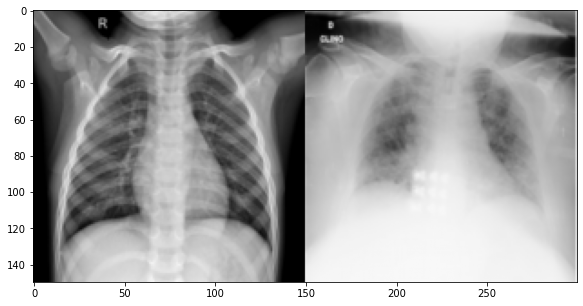

Normal Chest X-ray Vs Covid-19 Chest X-ray


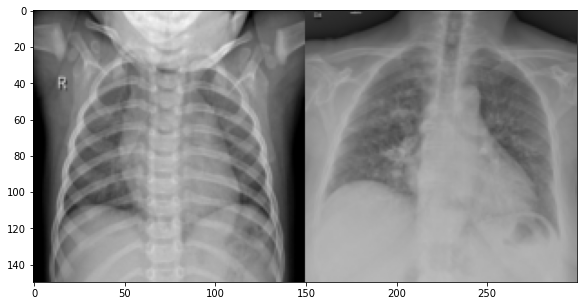

Normal Chest X-ray Vs Covid-19 Chest X-ray


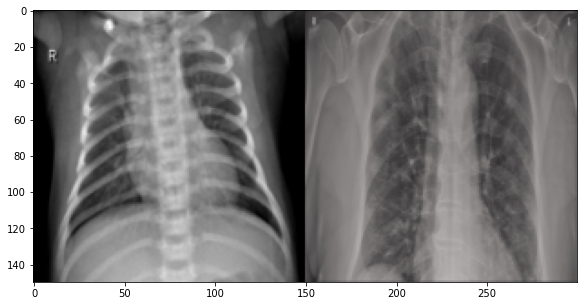

Normal Chest X-ray Vs Covid-19 Chest X-ray


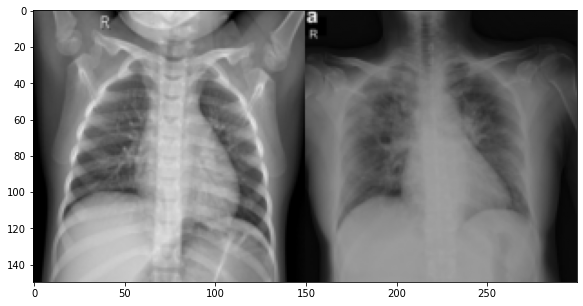

Normal Chest X-ray Vs Covid-19 Chest X-ray


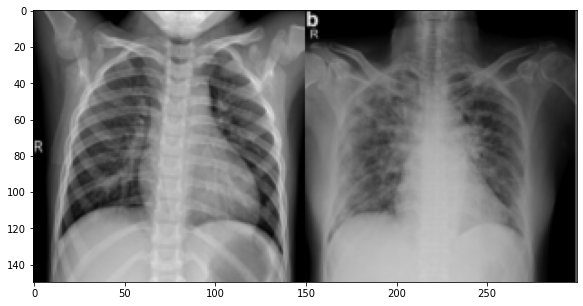

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [ ]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
(X_train,X_test,y_train,y_test) = train_test_split(data,labels,test_size=0.2,random_state=42,stratify=labels)

In [ ]:
print(X_train.shape,X_test.shape)

(160, 224, 224, 3) (40, 224, 224, 3)


In [ ]:
trainaug = ImageDataGenerator(
            rotation_range=15,
            fill_mode='nearest',
            )

In [ ]:
bModel = VGG16(include_top=False,weights='imagenet',input_tensor=Input(shape=(224,224,3)))
bModel.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
hModel = bModel.output
hModel = AveragePooling2D(pool_size=(4,4))(hModel)
hModel = Flatten()(hModel)
hModel = Dense(128,activation='relu')(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2,activation='softmax')(hModel)

model = Model(bModel.input,hModel)

for layer in bModel.layers:
  layer.trainable=False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


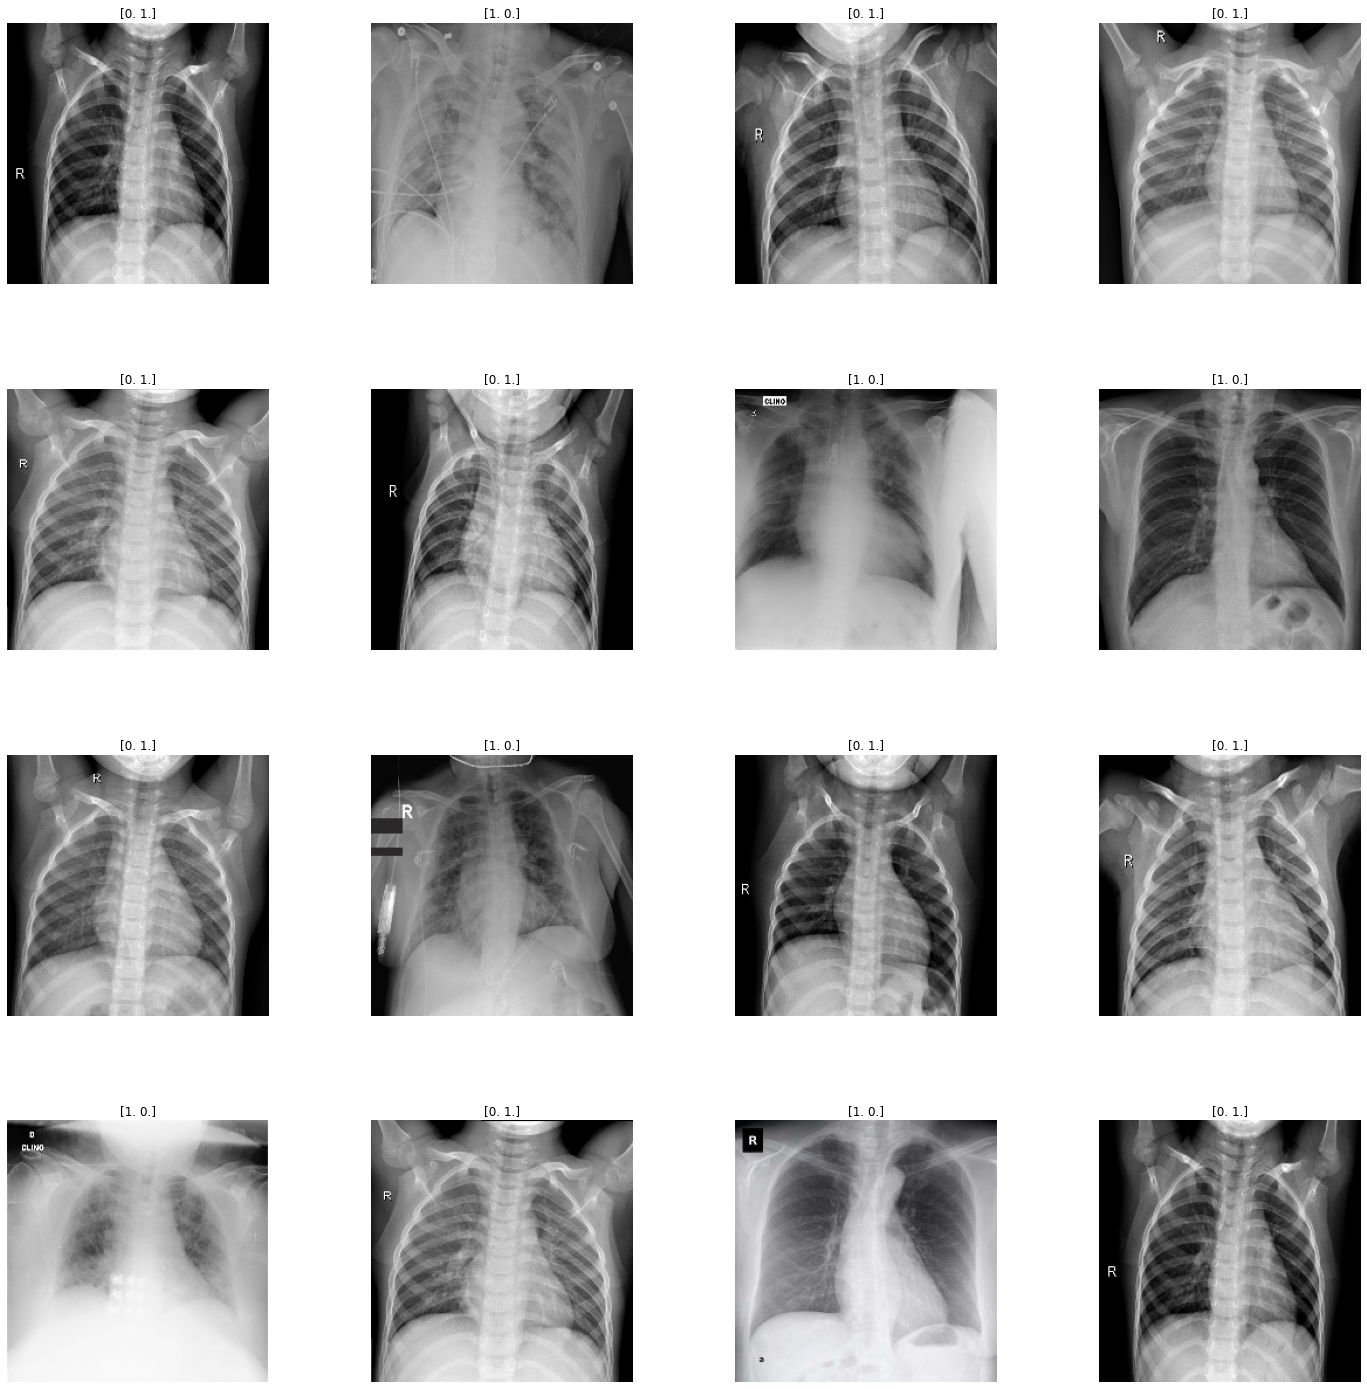

In [ ]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
R = model.fit_generator(
    trainaug.flow(X_train, y_train, batch_size=BATCH),
    steps_per_epoch=len(X_train) // BATCH,
    validation_data=(X_test, y_test),
    validation_steps=len(X_test) // BATCH,
    epochs=EPOCHS)

Compiling Starts


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 102s 5s/step - loss: 0.7670 - accuracy: 0.5569 - val_loss: 0.5682 - val_accuracy: 0.9500
Epoch 2/10
20/20 [==============================] - 101s 5s/step - loss: 0.5455 - accuracy: 0.8489 - val_loss: 0.4485 - val_accuracy: 0.9250
Epoch 3/10
20/20 [==============================] - 100s 5s/step - loss: 0.4493 - accuracy: 0.9496 - val_loss: 0.3600 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 100s 5s/step - loss: 0.3234 - accuracy: 0.9712 - val_loss: 0.2984 - val_accuracy: 0.9250
Epoch 5/10
20/20 [==============================] - 100s 5s/step - loss: 0.2611 - accuracy: 0.9806 - val_loss: 0.2327 - val_accuracy: 0.9750
Epoch 6/10
20/20 [==============================] - 100s 5s/step - loss: 0.2172 - accuracy: 0.9707 - val_loss: 0.1908 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 100s 5s/step - loss: 0.1727 - accuracy: 0.9851 - val_loss: 0.1553 - val_accuracy: 1.0000
Epoch 8/10
20

In [ ]:
model.save('Covid19VGG16.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/Model_Covid.h5')

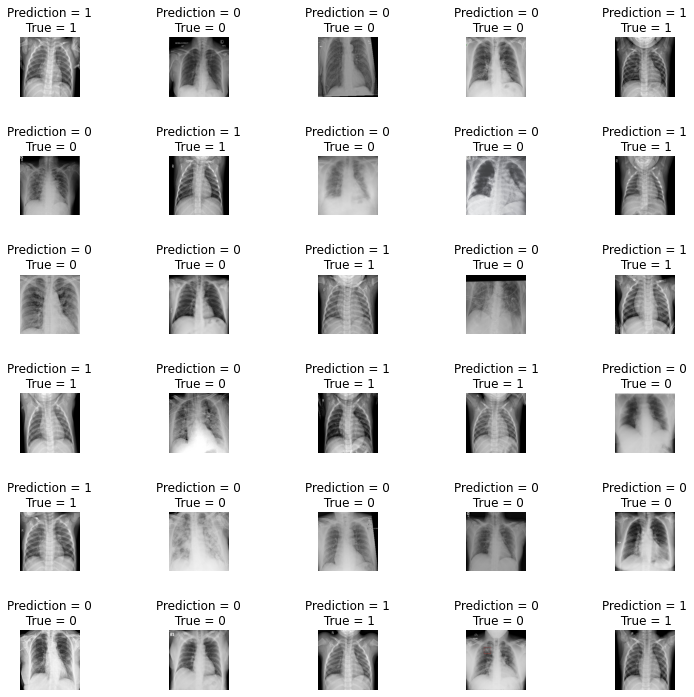

In [ ]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BATCH)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BATCH)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


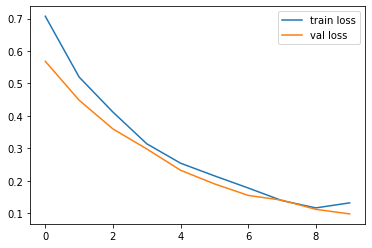

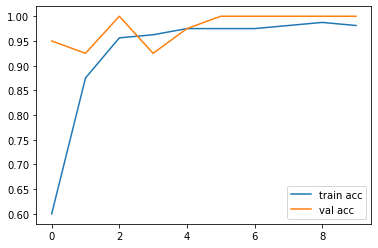

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
img = image.load_img('/content/shutterstock_107915651-min.jpg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

Prediction: Normal
